# Latihan Praktikum IF3270 2023/2024

Pembuatan model Machine Learning pada umumnya terdiri atas 5 bagian, yaitu:

1. Pengumpulan data
2. Pemahaman dan pemrosesan data
3. Pembuatan model
4. Evaluasi dan tuning model
5. Model final


Pada notebook ini, diharapkan dapat mengimplementasikan sebagian dari tahapan tersebut sebagai latihan.

Dataset yang digunakan adalah [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset). Berikut adalah deskripsi setiap kolom dari dataset (diperoleh dari sumber).

1) **id**: unique identifier
2) **gender**: "Male", "Female" or "Other"
3) **age**: age of the patient
4) **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) **ever_married**: "No" or "Yes"
7) **work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) **Residence_type**: "Rural" or "Urban"
9) **avg_glucose_level**: average glucose level in blood
10) **bmi**: body mass index
11) **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) **stroke**: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [755]:
# Import library di sini
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [756]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## A. Pemahaman dan Pemrosesan Data

Tahap ini bertujuan untuk memahami ciri dataset serta setiap fitur yang ada pada dataset. Secara garis besar, hal yang dicari pada tahap ini adalah

1. Ukuran data
2. Statistik setiap fitur
3. Data pencilan (outlier)
4. Korelasi
5. Penanganan data

### A.1. Ukuran Data

Tentukan ukuran data secara baris dan kolom

In [757]:
# Data size and each feature data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### A.2. Statistik setiap fitur

Dibantu penggunaan library Pandas, jawab pertanyaan berikut:
1. Kolom apa saja yang merupakan fitur kategorikal?
2. Kolom apa saja yang merupakan fitur nonkategorikal?

- Untuk setiap kolom kategorikal, tentukan jumlah dari masing-masing kategori pada kolom tersebut
- Untuk setiap kolom nonkategorikal, cari nilai minimum, maksimum, median, dan rata-ratanya

In [758]:
# Categorical features
categorical_feature_names = df.select_dtypes(include=['object', 'int64']).columns

print(f"Categorical features: {categorical_feature_names.to_list()}", end='\n\n')

for feature in categorical_feature_names:
    column_data_detail = df[feature].value_counts()
    print(column_data_detail, end='\n\n')

Categorical features: ['id', 'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

id
9046     1
22194    1
15104    1
28315    1
56996    1
        ..
897      1
4789     1
5686     1
37451    1
44679    1
Name: count, Length: 5110, dtype: int64

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

hypertension
0    4612
1     498
Name: count, dtype: int64

heart_disease
0    4834
1     276
Name: count, dtype: int64

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

stroke
0    4861
1     249
Name: count, dtype: int64



In [759]:
# Non-categorical features
non_categorical_feature_names = df.select_dtypes(exclude=['object', 'int64']).columns

print(f"Non-categorical features: {non_categorical_feature_names.to_list()}", end='\n\n')

for feature in non_categorical_feature_names:
    column_data = df[feature]

    print(feature)
    print(f"Minimum: {column_data.min()}")
    print(f"Maximum: {column_data.max()}")
    print(f"Median : {column_data.median()}")
    print(f"Mean   : {column_data.mean()}", end='\n\n')

Non-categorical features: ['age', 'avg_glucose_level', 'bmi']

age
Minimum: 0.08
Maximum: 82.0
Median : 45.0
Mean   : 43.226614481409

avg_glucose_level
Minimum: 55.12
Maximum: 271.74
Median : 91.88499999999999
Mean   : 106.1476771037182

bmi
Minimum: 10.3
Maximum: 97.6
Median : 28.1
Mean   : 28.893236911794666



### A.3. Data Pencilan

1. Tentukan jika ada missing value dari setiap fitur
2. Tentukan outlier dari setiap fitur

In [760]:
# Each feature missing value
print("Missing value for each feature:")
print(df.isnull().sum().sort_values(ascending=False))

Missing value for each feature:
bmi                  201
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64


In [761]:
# Outlier for non-categorical feature
idx_to_remove = []

for feature in non_categorical_feature_names:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]

    print(f"Feature '{feature}': {len(outliers)} outliers")
    if len(outliers) != 0:
        print(f"Values: {set(outliers.tolist())}")
        idx_to_remove.extend(outliers.index.tolist())
    print()

Feature 'age': 0 outliers

Feature 'avg_glucose_level': 627 outliers
Values: {219.82, 223.78, 203.27, 221.8, 227.74, 212.19, 202.06, 226.28, 216.4, 187.99, 206.52, 234.45, 217.4, 230.74, 215.69, 169.67, 170.05, 171.23, 170.95, 173.43, 174.12, 175.29, 169.97, 169.49, 178.29, 179.12, 180.93, 180.63, 182.99, 182.2, 184.4, 185.17, 186.21, 185.49, 180.76, 189.84, 190.32, 191.61, 191.82, 193.94, 194.99, 195.23, 196.92, 197.54, 196.71, 190.14, 200.59, 194.37, 202.05, 203.81, 204.86, 204.63, 204.5, 204.57, 204.17, 205.84, 205.23, 205.26, 205.5, 204.05, 206.72, 206.25, 207.58, 208.05, 209.58, 210.95, 211.06, 212.01, 213.37, 214.45, 215.6, 216.58, 217.3, 218.46, 219.91, 220.49, 222.21, 222.29, 223.36, 224.71, 225.47, 226.7, 227.1, 237.58, 229.92, 239.82, 231.19, 237.17, 242.84, 234.58, 244.28, 236.84, 246.53, 239.64, 239.07, 240.09, 243.58, 242.52, 243.53, 247.51, 249.31, 250.89, 252.72, 251.6, 250.2, 254.6, 254.63, 259.63, 253.16, 263.32, 255.17, 260.85, 266.59, 267.76, 267.61, 263.56, 261.67, 

In [762]:
# Duplicate data row
duplicate = df[df.duplicated()]
print(f"Number of duplicate data row: {len(duplicate)}")

Number of duplicate data row: 0


In [763]:
# Uncommon value of each categorical feature
threshold = 0.01

for feature in categorical_feature_names:
    if feature != 'id' :
        value_counts = df[feature].value_counts(normalize=True)
        uncommon_values = value_counts[value_counts < threshold].index.tolist()

        uncommon_values_column = df[df[feature].isin(uncommon_values)][feature]

        print(f"Feature '{feature}': {len(uncommon_values)} uncommmon values")
        if len(uncommon_values) != 0:
            print(f"Values: {uncommon_values}")
            idx_to_remove.extend(uncommon_values_column.index.tolist())
        print()
            
            

Feature 'gender': 1 uncommmon values
Values: ['Other']

Feature 'hypertension': 0 uncommmon values

Feature 'heart_disease': 0 uncommmon values

Feature 'ever_married': 0 uncommmon values

Feature 'work_type': 1 uncommmon values
Values: ['Never_worked']

Feature 'Residence_type': 0 uncommmon values

Feature 'smoking_status': 0 uncommmon values

Feature 'stroke': 0 uncommmon values



### A.4. Korelasi

Buatlah heatmap dari dataset. Fitur apa yang paling berkorelasi?

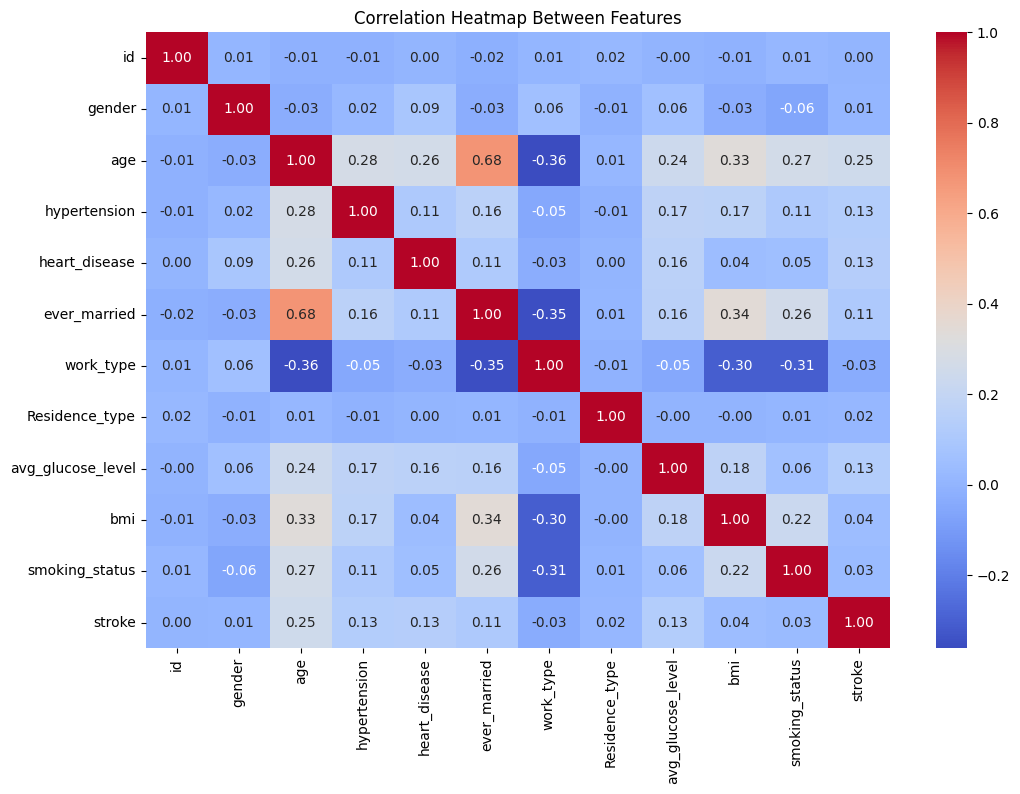

In [764]:
df_for_heatmap = df.copy()

encoder = LabelEncoder()
for feature in categorical_feature_names:
    df_for_heatmap[feature] = encoder.fit_transform(df_for_heatmap[feature].astype(str))

correlation_matrix = df_for_heatmap.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap Between Features")
plt.show()

### A.5. Penanganan Data

Pada A.1 hingga A.4, kamu telah melakukan pencarian insight pada data. Apabila diperlukan, lakukan analisis mandiri lebih lanjut.

Berikutnya, lakukan pemrosesan sebelum dataset dapat digunakan untuk training model. Kamu dapat melakukan berbagai macam pemrosesan, berikut adalah beberapa contohnya.
1) Menangani nilai yang hilang: Buang fitur atau ganti nilai yang hilang dengan strategi tertentu.
2) Transformasi fitur kategorikal: Ubah menjadi representasi angka seperti penggunaan one-hot encoding atau label encoding
3) Scaling: Dapat menggunakan MinMaxScaler, StandardScaler, atau scaler lainnya.
4) Membuang fitur yang sekiranya tidak diperlukan.
5) Menambah fitur dari fitur yang sudah ada (feature engineering).

In [765]:
# Remove row with outlier and uncommmon value
print(f"Shape before removing outliers and uncommon values: {df.shape}")
df = df.drop(idx_to_remove)
print(f"Shape after removing outliers and uncommon values: {df.shape}")

Shape before removing outliers and uncommon values: (5110, 12)
Shape after removing outliers and uncommon values: (4378, 12)


In [766]:
# # Change null value into mean (non-categorical feature) or mode (categorical-feature)
# for feature in categorical_feature_names:
#     if feature != 'id':
#         df[feature] = df[feature].fillna(df[feature].mode()[0])

# for feature in non_categorical_feature_names:
#     df[feature] = df[feature].fillna(df[feature].mean())

# print("Missing value for each feature:")
# print(df.isnull().sum().sort_values(ascending=False))

# Remove row with null value
print(f"Shape before removing null values: {df.shape}")
df = df.dropna()
print(f"Shape after removing null values: {df.shape}")

Shape before removing null values: (4378, 12)
Shape after removing null values: (4238, 12)


In [767]:
# Remove duplicate rows
print(f"Shape before removing duplicate rows: {df.shape}")
df = df.drop_duplicates()
print(f"Shape after removing duplicate rows: {df.shape}")

Shape before removing duplicate rows: (4238, 12)
Shape after removing duplicate rows: (4238, 12)


In [768]:
# Scale non-categorical features
scaler = MinMaxScaler()

for feature in non_categorical_feature_names:
    df[feature] = scaler.fit_transform(df[[feature]])

In [769]:
# Encode categorical features
label_encoder = LabelEncoder()

for feature in categorical_feature_names:
    df[feature] = label_encoder.fit_transform(df[feature])

# df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])

# work_type_one_hot_encoded = pd.get_dummies(df['work_type'], prefix='work_type')
# df = pd.concat([df, work_type_one_hot_encoded], axis=1)
# df.drop('work_type', axis=1, inplace=True)
# df.replace({True: 1, False: 0}, inplace=True)


In [770]:
df.drop('id', axis=1, inplace=True)

In [771]:
# Show dataframe after pre-processing data
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1,0.975586,0,1,1,1,0,0.447341,0.596774,2,1
6,1,0.902344,1,1,1,1,0,0.131825,0.459677,2,1
7,0,0.841309,0,0,0,1,1,0.345808,0.336022,2,1
9,0,0.951172,0,0,1,1,1,0.030380,0.373656,0,1
10,0,0.987793,1,0,1,1,0,0.222878,0.521505,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,0.157715,0,0,0,3,0,0.422332,0.223118,0,0
5106,0,0.987793,0,0,1,2,1,0.617119,0.798387,2,0
5107,0,0.426270,0,0,1,2,0,0.245421,0.545699,2,0
5108,1,0.621582,0,0,1,1,0,0.978954,0.411290,1,0


## B. Design of Experiment
Tentukanlah metrik yang akan digunakan pada eksperimen kali ini. Metrik yang dapat lebih dari satu jenis.

Metrik utama yang akan digunakan dalam eksperimen adalah F1-score. F1-score adalah hasil rata-rata harmonis dari nilai _precision_ dan _recall_. F1-score mempertimbangkan nilai _precision_ dan _recall_ dan menghasilkan sebuah metrik yang seimbang, sehingga apabila salah satu nilai _precision_ atau _recall_ lebih rendah, salah satu nilai akan menyeimbangkan mettrik lainnya.

Nilai F1 yang tinggi melambangkan nilai _precision_ dan _recall_ yang tinggi, dan memberikan hasil yang baik pada permasalahan klasifikasi data yang imbalanced. Akan tetapi, nilai F1 yang rendah sulit memberikan informasi mengenai metrik yang bernilai rendah.

Ada beberapa alasan untuk menggunakan F1-score:
- F1-score memberikan _measure_ yang lebih baik untuk persoalan dataset yang tidak seimbang. Dalam kasus dataset ini, _instance_ dengan nilai positif lebih banyak dibandingkan _instance_ dengan nilai negatif, sehingga akurasi dapat menjadi metrik yang tidak tepat, sehingga lebih baik menggunakan F1-score yang mempertimbangkan nilai _precision_ dan _recall_
- F1-score sudah menggambarkan kemampuan model untuk memprediksi dan mengidentifikasi kelas data positif dan negatif dalam klasifikasi biner
- Pada eksperimen ini, akan dilakukan beberapa perbandingan model (_Logistic Regression_, _XGBoost_, hasil hiperparameter, hasil _oversampling / undersampling_, hasil _voting_), dan nilai F1-score cocok digunakan untuk membandingkan kemampuan antar model.


Selain F1, metrik lain yang dapat digunakan adalah akurasi, yang menggambarkan seberapa tepat sebuah model dapat melakukan klasifikasi. Nilai akurasi dapat digunakan untuk membandingkan ketepatan klasifikasi dua buah model apabila nilai F1-nya sama.

### B.1. Dataset Split

Lakukan pemisahan antara data training (80%) dan data validasi (20%). Kolom `stroke` adalah target pada dataset ini.

In [772]:
# Split into features and target
X = df.drop('stroke', axis=1)
y = df['stroke'].copy()

# Split into trainng and validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [773]:
# Print data size
print(f"Training data: {y_train.shape[0]} rows")
print(f"Validation data: {y_val.shape[0]} rows")

Training data: 3390 rows
Validation data: 848 rows


### B.2. Baseline Training

Lakukan training dengan menggunakan `LogisticRegression`. Evaluasi hasilnya dengan confusion matrix dan deskripsikan dengan singkat hal yang terjadi pada model tersebut.

In [774]:
# Logistic Regression model training
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Prediction and evaluation
y_pred = logreg.predict(X_val)

print("Classification Report:")
print(classification_report(y_val, y_pred))
print(f"F1 Score: {f1_score(y_val, y_pred)}")
print(f"Accuracy Score: {accuracy_score(y_val, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_val, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       814
           1       0.00      0.00      0.00        34

    accuracy                           0.96       848
   macro avg       0.48      0.50      0.49       848
weighted avg       0.92      0.96      0.94       848

F1 Score: 0.0
Accuracy Score: 0.9599056603773585
Confusion Matrix:
[[814   0]
 [ 34   0]]


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### B.3. Hyperparameter Tuning

Lakukan pengaturan hyperparameter pada model Logistic Regression dan training kembali. Apakah hasilnya berubah?

In [775]:
# Parameter Grid Space
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Get best model and evaluate
tuned_logreg = grid_search.best_estimator_
y_pred = tuned_logreg.predict(X_val)
print("\nClassification Report:")
print(classification_report(y_val, y_pred))
print(f"F1 Score: {f1_score(y_val, y_pred)}")
print(f"Accuracy Score: {accuracy_score(y_val, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_val, y_pred)}")


Best Parameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.9699115044247788

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       814
           1       0.00      0.00      0.00        34

    accuracy                           0.96       848
   macro avg       0.48      0.50      0.49       848
weighted avg       0.92      0.96      0.94       848

F1 Score: 0.0
Accuracy Score: 0.9599056603773585
Confusion Matrix:
[[814   0]
 [ 34   0]]


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### B.4. Training Model Lain

Kamu dapat melakukan training dengan model-model lain seperti Random Forest, Decision Tree, dan KNN serta atur hyperparameter-nya. Bandingkan hasilnya dengan baseline Logistic Regression.

[Referensi](https://scikit-learn.org/stable/supervised_learning.html)

In [776]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier

# # Train beberapa model lain
# models = {
#     'Random Forest': RandomForestClassifier(random_state=42),
#     'Decision Tree': DecisionTreeClassifier(random_state=42),
#     'KNN': KNeighborsClassifier()
# }

# # Evaluasi setiap model
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_val)
#     print(f"\n{name} - Classification Report:")
#     print(classification_report(y_val, y_pred))


## C. Improvement

Dataset imbalance merupakan kasus yang umum terjadi saat pembuatan model machine learning. Kasus ini dapat diatasi dengan melakukan oversampling pada target minoritas ataupun undersampling pada dataset mayoritas.

[Referensi](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)

### C.1. Oversampling

Lakukan strategi oversampling pada dataset mayoritas. Training kembali model baseline dan lakukan evaluasi dengan confusion matrix.

In [777]:
# Oversampling
oversampler = RandomOverSampler(sampling_strategy="minority", random_state=42)
oversampler_X_train, oversampler_y_train = oversampler.fit_resample(X_train, y_train)
print(f"Jumlah sampel: {len(oversampler_X_train)}")

# Train model with oversampled data
oversampler_logreg = LogisticRegression(max_iter=1000, random_state=42)
oversampler_logreg.fit(oversampler_X_train, oversampler_y_train)

# Evaluasi model 
oversampler_y_pred = oversampler_logreg.predict(X_val)
print("\nClassification Report:")
print(classification_report(y_val, oversampler_y_pred))
print(f"F1 Score: {f1_score(y_val, oversampler_y_pred)}")
print(f"Accuracy Score: {accuracy_score(y_val, oversampler_y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_val, oversampler_y_pred)}")

Jumlah sampel: 6576

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.74      0.84       814
           1       0.10      0.71      0.18        34

    accuracy                           0.74       848
   macro avg       0.54      0.72      0.51       848
weighted avg       0.95      0.74      0.82       848

F1 Score: 0.17712177121771217
Accuracy Score: 0.7370283018867925
Confusion Matrix:
[[601 213]
 [ 10  24]]


### C.2. Undersampling
Lakukan strategi undersampling pada dataset minoritas. Training kembali model dan lakukan evaluasi dengan confusion matrix.

In [778]:
from imblearn.under_sampling import RandomUnderSampler

# Implementasi Undersampling
undersampler = RandomUnderSampler()
X_resampled_under, Y_resampled_under = undersampler.fit_resample(X_train, Y_train)

# Training model Logistic Regression pada data yang sudah di undersample
model_under = LogisticRegression()
model_under.fit(X_resampled_under, Y_resampled_under)

# Evaluasi model
Y_pred_under = model_under.predict(X_val)
print("Confusion Matrix after Undersampling:")
print(confusion_matrix(Y_val, Y_pred_under))
print("\nClassification Report after Undersampling:")
print(classification_report(Y_val, Y_pred_under))

NameError: name 'Y_train' is not defined

### C.3. Model Ensembling

Sebagai tambahan dari strategi oversampling dan undersampling, kinerja prediksi dapat ditingkatkan dengan membuat beberapa model berbeda menjadi satu model utuh. Contohnya adalah penggabungan Logistic Regression dan Random Forest.

Dari scikit-learn, terdapat dua jenis ensembling paling umum yaitu Voting Classifier dan Stacking Classifier. Gunakan kedua strategi ini pada jenis-jenis model yang berbeda, lakukan training pada oversampled atau undersampled data dan bandingkan hasilnya dengan baseline Logistic Regression.

[Referensi](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier

# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier())
], voting='soft')
voting_clf.fit(X_resampled, Y_resampled)

# Evaluasi Voting Classfier
Y_pred_voting = voting_clf.predict(X_val)
print("Confusion Matrix for Voting Classifier")
print(confusion_matrix(Y_val, Y_pred_voting))
print("\nClassification Report for Voting Classifier")
print(classification_report(Y_val, Y_pred_voting))

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier())
], final_estimator=LogisticRegression())
stacking_clf.fit(X_resampled, Y_resampled) # Training pada data oversampled

# Evaluasi Stacking Classifier
Y_pred_stacking = stacking_clf.predict(X_val)
print("Confusion Matrix for Stacking Classifier")
print(confusion_matrix(Y_val, Y_pred_stacking))
print("\nConfusion Matrix for Stacking Classifier")
print(classification_report(Y_val, Y_pred_stacking))




Confussion Matrix for Voting Classifier
[[804  36]
 [ 33   3]]

Classification Report for Voting Classifier
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       840
           1       0.08      0.08      0.08        36

    accuracy                           0.92       876
   macro avg       0.52      0.52      0.52       876
weighted avg       0.92      0.92      0.92       876

Confussion Matrix for Stacking Classifier
[[807  33]
 [ 32   4]]

Confussion Matrix for Stacking Classifier
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       840
           1       0.11      0.11      0.11        36

    accuracy                           0.93       876
   macro avg       0.53      0.54      0.54       876
weighted avg       0.93      0.93      0.93       876



## D. Model Final
Tentukan model yang memiliki kinerja terbaik serta berikan alasannya.

In [ ]:
from sklearn.metrics import f1_score

# Evaluasi F1-score dari semua model
f1_score = {
    'Baseline': f1_score(Y_val, logreg.predict(X_val)),
    'SMOTE': f1_score(Y_val, model_smote.predict(X_val)),
    'Undersampling': f1_score(Y_val, model_under.predict(X_val)),
    'Voting Classifier': f1_score(Y_val, voting_clf.predict(X_val)),
    'Stacking Classifier': f1_score(Y_val, stacking_clf.predict(X_val))
}

# Cetak F1-score dari semua model
print("F1-Scores of Different Models")
for model_name, f1 in f1_score.items():
    print(f"{model_name}: {f1:.4f}")

# Menentukan model dengan F1-score tertinggi
best_model_name = max(f1_score, key=f1_score.get)
best_f1_score = f1_score[best_model_name]
print(f"\nModel with the best F1-score: {best_model_name} ({best_f1_score:.4f})")

# Alasan pemilihan 
print("\nAlasan pemilihan model")
print(f"Model '{best_model_name}' dipilih sebagai model terbaik karena memiliki F1-score tertinggi di antara semua model yang diuji.")
print("Ini menunjukkan bahwa model ini memiliki keseimbangan terbaik antara precision dan recall, yang sangat penting dalam menangani dataset yang tidak seimbang.")

F1-Scores of Different Models
Baseline: 0.0000
SMOTE: 0.0000
Undersampling: 0.0000
Voting Classifier: 0.0800
Stacking Classifier: 0.1096

Model with the best F1-score: Stacking Classifier (0.1096)

Alasan pemilihan model
Model 'Stacking Classifier' dipilih sebagai model terbaik karena memiliki F1-score tertinggi di antara semua model yang diuji.
Ini menunjukkan bahwa model ini memiliki keseimbangan terbaik antara precision dan recall, yang sangat penting dalam menangani dataset yang tidak seimbang.
